## Real data

Die Daten im Notebook 03.data.ipynb habe ich für euch vorbereitet. 
Leider begegnen uns Daten in den meisten Fällen nicht so schön maschinenlesbar. 
Die Wahrheit ist: Da draußen ist der Daten-Dschungel und es ist gar nicht so einfach das, was wir brauchen, da rauszuziehen. 

**So findest du die bittere Wahrheit heraus** 
- Gehe auf [https://www-genesis.destatis.de/] 
- suche nach 'Durchschnittsalter der habilitierten Personen'. 
- Dann auf 'Werteabruf' und die Tabelle bitte als 'Flat' in ./data abspeichern.

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999

In [142]:
df = pd.read_csv('./data/21351-0002_flat.csv')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 8, saw 3


### Huppla - was ist passiert?

Schau dir die Tabelle in einem Tabellenprogramm an.
Was fällt dir auf?

- In deutschen Tabellen wird ';' statt ',' als Trenner für .csvs verwendet
- Dafür schreiben wir in Deutschland '42,3' statt '42.3'
- In der Tabelle gibt es fehlende Werte, die mit '-'
- Oft wird auch nicht das weltweit gebräuchliche 'uft-8' als Zeichenformat verwendet, sondern 'latin-1' oder 'iso-8859-1'

In [143]:
df = pd.read_csv('./data/21351-0002_flat.csv', sep=';', decimal=',', encoding='latin-1')
# sep steht für seperator, also Trennzeichen
# decimal soll '42,3' automatisch in '42.3' umwandeln
# encoding gibt das Zeichenformat an

In [144]:
df

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,1_Auspraegung_Code,1_Auspraegung_Label,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,2_Auspraegung_Label,3_Merkmal_Code,3_Merkmal_Label,3_Auspraegung_Code,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
0,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SKW,Geisteswissenschaften,GES,Geschlecht,GESM,männlich,"42,9"
1,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SKW,Geisteswissenschaften,GES,Geschlecht,GESW,weiblich,"41,6"
2,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SKW,Geisteswissenschaften,GES,Geschlecht,NaN,Insgesamt,"42,4"
3,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SPR,Sport,GES,Geschlecht,GESM,männlich,"41,5"
4,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SPR,Sport,GES,Geschlecht,GESW,weiblich,"39,3"
5,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SPR,Sport,GES,Geschlecht,NaN,Insgesamt,"40,8"
6,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-RWSW,"Rechts-, Wirtschafts- und Sozialwissenschaften",GES,Geschlecht,GESM,männlich,"39,7"
7,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-RWSW,"Rechts-, Wirtschafts- und Sozialwissenschaften",GES,Geschlecht,GESW,weiblich,"40,8"
8,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-RWSW,"Rechts-, Wirtschafts- und Sozialwissenschaften",GES,Geschlecht,NaN,Insgesamt,"40,0"
9,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-NATW,"Mathematik, Naturwissenschaften",GES,Geschlecht,GESM,männlich,"40,1"


### Puh, das sind viele Spalten!

In [145]:
# Zeige alle Spalten an 
df.columns

Index(['Statistik_Code', 'Statistik_Label', 'Zeit_Code', 'Zeit_Label', 'Zeit',
       '1_Merkmal_Code', '1_Merkmal_Label', '1_Auspraegung_Code',
       '1_Auspraegung_Label', '2_Merkmal_Code', '2_Merkmal_Label',
       '2_Auspraegung_Code', '2_Auspraegung_Label', '3_Merkmal_Code',
       '3_Merkmal_Label', '3_Auspraegung_Code', '3_Auspraegung_Label',
       'BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre'],
      dtype='object')

In [146]:
# So wählst du aus, welche Spalten du behalten willst
df = df[['Statistik_Label', 
         'Zeit', 
         '2_Auspraegung_Label',
         '3_Auspraegung_Label',
         'BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre']]

In [147]:
df.head()

,Statistik_Label,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
0,Statistik der Habilitationen,2010,Geisteswissenschaften,männlich,"42,9"
1,Statistik der Habilitationen,2010,Geisteswissenschaften,weiblich,"41,6"
2,Statistik der Habilitationen,2010,Geisteswissenschaften,Insgesamt,"42,4"
3,Statistik der Habilitationen,2010,Sport,männlich,"41,5"
4,Statistik der Habilitationen,2010,Sport,weiblich,"39,3"


In [148]:
# So kannst du ausgewählte Spalten weglassen 
df.drop(['Statistik_Label'], axis='columns', inplace=True)

/home/p3nny/pfv/myvenv/lib/python3.6/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [149]:
# So sieht die Tabelle schon übersichtlicher aus
df

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
0,2010,Geisteswissenschaften,männlich,"42,9"
1,2010,Geisteswissenschaften,weiblich,"41,6"
2,2010,Geisteswissenschaften,Insgesamt,"42,4"
3,2010,Sport,männlich,"41,5"
4,2010,Sport,weiblich,"39,3"
5,2010,Sport,Insgesamt,"40,8"
6,2010,"Rechts-, Wirtschafts- und Sozialwissenschaften",männlich,"39,7"
7,2010,"Rechts-, Wirtschafts- und Sozialwissenschaften",weiblich,"40,8"
8,2010,"Rechts-, Wirtschafts- und Sozialwissenschaften",Insgesamt,"40,0"
9,2010,"Mathematik, Naturwissenschaften",männlich,"40,1"


## Daten filtern

In [150]:
Wir müssen auswählen, was wir als in der Grafik darstellen wollen. Sagen wir mal uns interessiert besonders, wie sich die  

SyntaxError: invalid syntax (<ipython-input-150-52a30167b7ef>, line 1)

In [151]:
# So wählst du den DataFrame aus, wo sie Spalte "2_Ausprägung_Label" den Wert 'Kunst, Kunstgeschichte' enthält 
df[(df["2_Auspraegung_Label"] == 'Kunst, Kunstwissenschaft')]

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
27,2010,"Kunst, Kunstwissenschaft",männlich,"45,0"
28,2010,"Kunst, Kunstwissenschaft",weiblich,"47,6"
29,2010,"Kunst, Kunstwissenschaft",Insgesamt,"46,1"
60,2011,"Kunst, Kunstwissenschaft",männlich,"45,3"
61,2011,"Kunst, Kunstwissenschaft",weiblich,"45,4"
62,2011,"Kunst, Kunstwissenschaft",Insgesamt,"45,4"
93,2012,"Kunst, Kunstwissenschaft",männlich,"41,9"
94,2012,"Kunst, Kunstwissenschaft",weiblich,"47,1"
95,2012,"Kunst, Kunstwissenschaft",Insgesamt,"45,1"
126,2013,"Kunst, Kunstwissenschaft",männlich,"41,5"


In [152]:
# Wenn du nur die Daten für 'Insgesamt' auswählen willst
df[(df["2_Auspraegung_Label"] == 'Kunst, Kunstwissenschaft') & (df["3_Auspraegung_Label"] == 'Insgesamt')]

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
29,2010,"Kunst, Kunstwissenschaft",Insgesamt,"46,1"
62,2011,"Kunst, Kunstwissenschaft",Insgesamt,"45,4"
95,2012,"Kunst, Kunstwissenschaft",Insgesamt,"45,1"
128,2013,"Kunst, Kunstwissenschaft",Insgesamt,"45,1"
161,2014,"Kunst, Kunstwissenschaft",Insgesamt,"43,3"
194,2015,"Kunst, Kunstwissenschaft",Insgesamt,"44,4"
227,2016,"Kunst, Kunstwissenschaft",Insgesamt,"44,6"
260,2017,"Kunst, Kunstwissenschaft",Insgesamt,"45,2"
293,2018,"Kunst, Kunstwissenschaft",Insgesamt,"44,5"
326,2019,"Kunst, Kunstwissenschaft",Insgesamt,"48,1"


In [153]:
# Wenn du für Kunstgeschichte die daten für 'männlich' oder 'weiblich' auswählen willst
df[(df["2_Auspraegung_Label"] == 'Kunst, Kunstwissenschaft') & ((df["3_Auspraegung_Label"] == 'weiblich') | (df["3_Auspraegung_Label"] =='männlich')) ]

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
27,2010,"Kunst, Kunstwissenschaft",männlich,"45,0"
28,2010,"Kunst, Kunstwissenschaft",weiblich,"47,6"
60,2011,"Kunst, Kunstwissenschaft",männlich,"45,3"
61,2011,"Kunst, Kunstwissenschaft",weiblich,"45,4"
93,2012,"Kunst, Kunstwissenschaft",männlich,"41,9"
94,2012,"Kunst, Kunstwissenschaft",weiblich,"47,1"
126,2013,"Kunst, Kunstwissenschaft",männlich,"41,5"
127,2013,"Kunst, Kunstwissenschaft",weiblich,"46,9"
159,2014,"Kunst, Kunstwissenschaft",männlich,"43,4"
160,2014,"Kunst, Kunstwissenschaft",weiblich,"43,0"


In [154]:
# Erst wenn du dir sicher bist, dass das richtige gefiltert wird, überschreibst du deinen DataFrame
kunst = df[(df["2_Auspraegung_Label"] == 'Kunst, Kunstwissenschaft') & ((df["3_Auspraegung_Label"] == 'weiblich') | (df["3_Auspraegung_Label"] =='männlich')) ]

In [155]:
kunst

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
27,2010,"Kunst, Kunstwissenschaft",männlich,"45,0"
28,2010,"Kunst, Kunstwissenschaft",weiblich,"47,6"
60,2011,"Kunst, Kunstwissenschaft",männlich,"45,3"
61,2011,"Kunst, Kunstwissenschaft",weiblich,"45,4"
93,2012,"Kunst, Kunstwissenschaft",männlich,"41,9"
94,2012,"Kunst, Kunstwissenschaft",weiblich,"47,1"
126,2013,"Kunst, Kunstwissenschaft",männlich,"41,5"
127,2013,"Kunst, Kunstwissenschaft",weiblich,"46,9"
159,2014,"Kunst, Kunstwissenschaft",männlich,"43,4"
160,2014,"Kunst, Kunstwissenschaft",weiblich,"43,0"


## Visualisierung

In [156]:
kunst = kunst.set_index('Zeit')

In [157]:
kunst.head()

,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
Zeit,,,
2010,"Kunst, Kunstwissenschaft",männlich,"45,0"
2010,"Kunst, Kunstwissenschaft",weiblich,"47,6"
2011,"Kunst, Kunstwissenschaft",männlich,"45,3"
2011,"Kunst, Kunstwissenschaft",weiblich,"45,4"
2012,"Kunst, Kunstwissenschaft",männlich,"41,9"


In [158]:
kunst.plot()

TypeError: no numeric data to plot

### Hm, das mit dem Zahlenformat hat nicht geklappt

In [159]:
# In der Spalte mit dem Durchschnittsalter ist das Komma leider nicht korrekt ersetzt worden. Shit happens.
# Eine einzelne Spalte kann mit df.Name_der_Spalte aufgerufen werden. (Falls der Name der Spalte Leerzeichen oder Sonderzeichen enthält mit df['Name der Spalte'])
kunst.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre

Zeit
2010    45,0
2010    47,6
2011    45,3
2011    45,4
2012    41,9
2012    47,1
2013    41,5
2013    46,9
2014    43,4
2014    43,0
2015    44,3
2015    44,5
2016    43,1
2016    45,0
2017    45,6
2017    44,6
2018    43,5
2018    45,6
2019    50,1
2019    45,4
Name: BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre, dtype: object

In [160]:
# Dass das nicht geklappt hat, liegt daran, dass es ürsprünglich mal fehlende Werte gab, die das Zeichen '-' enthalten haben (Bei 'Veterinärmedizin' gibt es in der .csv von destatis keine Daten ab 2015)
# Durch das Filtern sind wir diese seltsamen Werte losgeworden. Leider enthalten unsere Werte immer noch ',' statt '.'.
# Um zu sehen, welche Werte vorhanden sind, kannst du zum Beispiel zählen lassen, wie welche Werte wie oft vorkommen.   
kunst.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.value_counts()

45,4    2
45,0    2
45,6    2
41,9    1
44,5    1
44,3    1
47,6    1
43,1    1
44,6    1
41,5    1
43,4    1
43,0    1
47,1    1
45,3    1
50,1    1
43,5    1
46,9    1
Name: BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre, dtype: int64

In [161]:
# Also bereinigen wir die Spalte selbst. Pandas ist gut darin, Strings zu verändern. In diesem Fall wollen wir in unserer Spalte ',' durch '.' ersetzen
kunst.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = kunst.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.str.replace(',', '.')

In [162]:
kunst.head()

,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
Zeit,,,
2010,"Kunst, Kunstwissenschaft",männlich,45.0
2010,"Kunst, Kunstwissenschaft",weiblich,47.6
2011,"Kunst, Kunstwissenschaft",männlich,45.3
2011,"Kunst, Kunstwissenschaft",weiblich,45.4
2012,"Kunst, Kunstwissenschaft",männlich,41.9


In [163]:
# Die ',' wurden zwar durch '.' ersetzt, aber der Datentyp ist immer noch 'Object'. Wir brauchen aber numerische Daten (int, float) zum plotten. 
kunst.dtypes

2_Auspraegung_Label                                             object
3_Auspraegung_Label                                             object
BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre    object
dtype: object

In [164]:
kunst.plot()

TypeError: no numeric data to plot

In [165]:
# So änderst du den datentyp auf float
kunst.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = kunst.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.astype('float')

<AxesSubplot:xlabel='Zeit'>

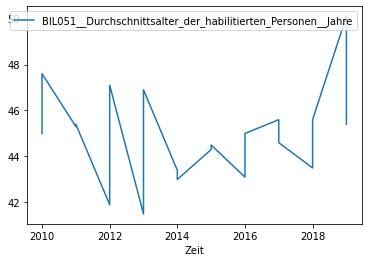

In [166]:
kunst.plot()

<AxesSubplot:xlabel='Zeit'>

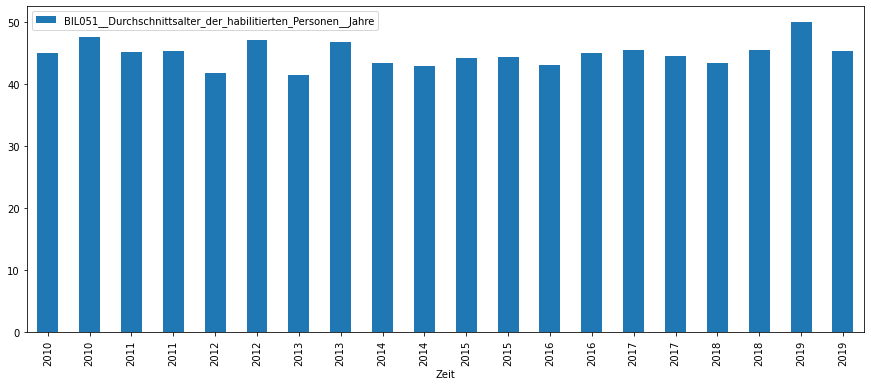

In [167]:
kunst.plot(kind="bar", figsize=(15,6))

## Übung

In [168]:
# Zeige, wie sich das Durchschnittsalter der habilitierten Personen in Deutschland insgesamt verändert hat

insgesamt = df[(df["2_Auspraegung_Label"] == 'Insgesamt') & (df["3_Auspraegung_Label"] == 'Insgesamt')]

In [169]:
insgesamt = insgesamt.set_index('Zeit')

In [170]:
insgesamt.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = insgesamt.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.str.replace(',', '.')

In [171]:
insgesamt.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = insgesamt.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.astype('float')

<AxesSubplot:xlabel='Zeit'>

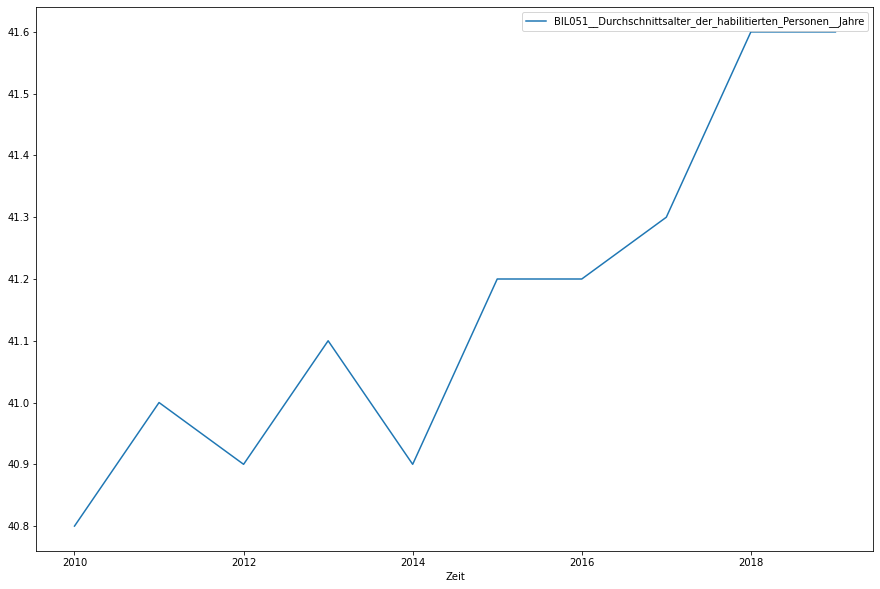

In [172]:
# Stelle die Veränderung in einem Linechart dar

insgesamt.plot(figsize=(15,10))

## Gruppieren, Pivotieren

In [212]:
df.head()

,2_Auspraegung_Label,3_Auspraegung_Label,4_Auspraegung_Label,BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre
0,männlich,ledig,Insgesamt,24
1,männlich,ledig,Europa,25
2,männlich,ledig,EU-28 (seit 01.07.2013),27
3,männlich,ledig,Drittstaaten zu EU-28 (seit 01.07.2013),22
4,männlich,ledig,EU-27 (bis 30.06.2013),28


In [174]:
df.dtypes

Zeit                                                             int64
2_Auspraegung_Label                                             object
3_Auspraegung_Label                                             object
BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre    object
dtype: object

In [175]:
df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.str.replace(',', '.')

/home/p3nny/pfv/myvenv/lib/python3.6/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [176]:
df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.astype('float')

ValueError: could not convert string to float: '-'

In [177]:
df = df[(df['2_Auspraegung_Label'] != 'Veterinärmedizin') & 
        (df['2_Auspraegung_Label'] != 'Agrar-, Forst- und Ernährungswissenschaften') & 
        (df['2_Auspraegung_Label'] != 'Agrar-, Forst- u.Ernährungswiss., Veterinärmedizin') &
        (df['2_Auspraegung_Label'] != 'Sport')
       ]

In [178]:
df['2_Auspraegung_Label'].value_counts()

Rechts-, Wirtschafts- und Sozialwissenschaften    30
Mathematik, Naturwissenschaften                   30
Insgesamt                                         30
Ingenieurwissenschaften                           30
Kunst, Kunstwissenschaft                          30
Geisteswissenschaften                             30
Humanmedizin/Gesundheitswissenschaften            30
Name: 2_Auspraegung_Label, dtype: int64

In [179]:
df.dtypes

Zeit                                                             int64
2_Auspraegung_Label                                             object
3_Auspraegung_Label                                             object
BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre    object
dtype: object

In [205]:
df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.value_counts().head()

AttributeError: 'DataFrame' object has no attribute 'BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre'

In [181]:
df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.astype('float')

In [182]:
alter_im_schnitt_ueber_die_jahre = df.groupby('2_Auspraegung_Label').mean().round(2).sort_values('BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre', ascending=False)

In [183]:
alter_im_schnitt_ueber_die_jahre

,Zeit,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
2_Auspraegung_Label,,
"Kunst, Kunstwissenschaft",2014.5,45.02
Geisteswissenschaften,2014.5,42.98
Ingenieurwissenschaften,2014.5,42.56
Insgesamt,2014.5,41.23
"Mathematik, Naturwissenschaften",2014.5,40.95
Humanmedizin/Gesundheitswissenschaften,2014.5,40.70
"Rechts-, Wirtschafts- und Sozialwissenschaften",2014.5,40.33


<AxesSubplot:title={'center':'Durchschnittsalter der habilitierten Personen'}, ylabel='2_Auspraegung_Label'>

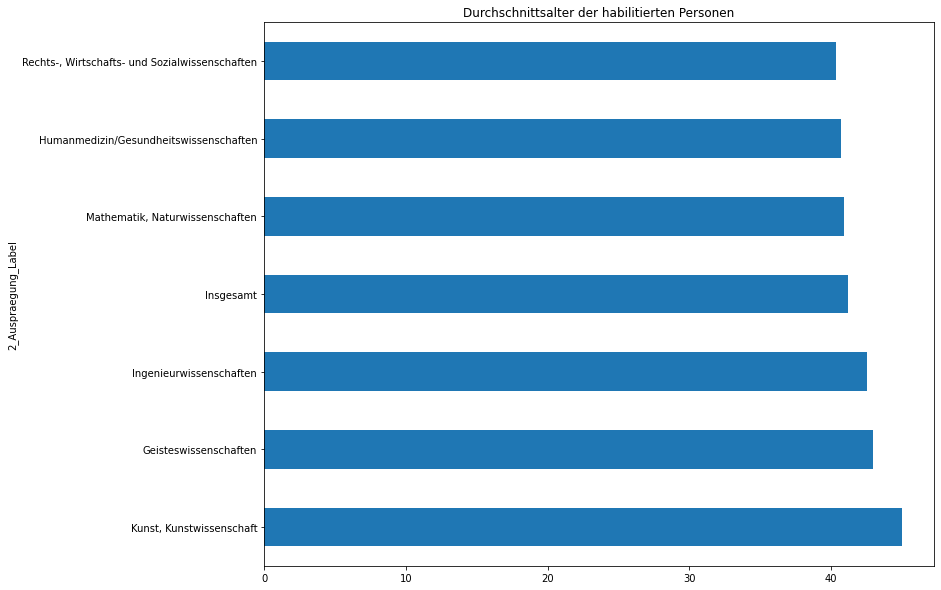

In [184]:
alter_im_schnitt_ueber_die_jahre.plot.barh(y='BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre', 
                                           legend=False, 
                                           title="Durchschnittsalter der habilitierten Personen",
                                          figsize=(12,10))

## Übung 1

Aus welchem Gebiet stamen im Schnitt die jüngsten männlichen Eingebürgerten?

- Suche auf [https://www-genesis.destatis.de/] nach 'Durchschnittsalter der Eingebürgerten: Deutschland, Jahre, Ländergruppierungen/Staatsangehörigkeit, Geschlecht,Familienstand
- Lade den Datensatz als Flat.csv herunter
- Lesen ihn als DataFrame ein

In [190]:
df = pd.read_csv('./data/12511-0007_flat.csv', sep=';', decimal=',', encoding='latin-1')

In [191]:
df.columns

Index(['Statistik_Code', 'Statistik_Label', 'Zeit_Code', 'Zeit_Label', 'Zeit',
       '1_Merkmal_Code', '1_Merkmal_Label', '1_Auspraegung_Code',
       '1_Auspraegung_Label', '2_Merkmal_Code', '2_Merkmal_Label',
       '2_Auspraegung_Code', '2_Auspraegung_Label', '3_Merkmal_Code',
       '3_Merkmal_Label', '3_Auspraegung_Code', '3_Auspraegung_Label',
       '4_Merkmal_Code', '4_Merkmal_Label', '4_Auspraegung_Code',
       '4_Auspraegung_Label',
       'BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre'],
      dtype='object')

In [192]:
df = df[['2_Auspraegung_Label', '3_Auspraegung_Label', '4_Auspraegung_Label', 'BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre']]

In [194]:
df.head()

,2_Auspraegung_Label,3_Auspraegung_Label,4_Auspraegung_Label,BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre
0,männlich,ledig,Insgesamt,24
1,männlich,ledig,Europa,25
2,männlich,ledig,EU-28 (seit 01.07.2013),27
3,männlich,ledig,Drittstaaten zu EU-28 (seit 01.07.2013),22
4,männlich,ledig,EU-27 (bis 30.06.2013),28


In [204]:
df['2_Auspraegung_Label'].value_counts()

weiblich    273
männlich    273
Name: 2_Auspraegung_Label, dtype: int64

In [207]:
df = df[(df['2_Auspraegung_Label'] == 'männlich') & 
        (df['3_Auspraegung_Label'] == 'ledig')]

In [211]:
df.sort_values('BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre', ascending=True).head()

,2_Auspraegung_Label,3_Auspraegung_Label,4_Auspraegung_Label,BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre
30,männlich,ledig,Süd- und Südostasien,20
36,männlich,ledig,Gebiet der ehemaligen Sowjetunion,21
35,männlich,ledig,Gebiet des ehemaligen Serbien und Montenegro,21
22,männlich,ledig,Ostafrika,21
37,männlich,ledig,Gebiet der ehemaligen Tschechoslowakei,21


## Übung

- Such dir einen Datensatz in [https://www-genesis.destatis.de/]
- Lade den Datensatz als Flat-Table herunter
- Lese ihn als DataFrame ein
- Stelle dir eine Frage zu diesem Datensatz, die du beantworten willst 
- Wähle die Spalten aus, die du brauchst
- Filtere den Datensatz ggf. so, dass fehlende Daten ausgeblendet werden
- Gruppiere, sortiere falls nötig
- Beantworte deine Frage